In [150]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [151]:
# fetching data from computer 
import pandas as pd
data=pd.read_csv(r"C:\Users\malik\Downloads\Data-Science-ML-Capstone-Projects-master (1)\Data-Science-ML-Capstone-Projects-master\avocado.csv")
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [152]:
# To fetch the details of rows
pd.set_option('display.max_rows',None)

In [153]:
# To fetch the detail of rows and coloumns
data.shape

(16468, 14)

In [154]:
# To fetch the details of columns 
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [155]:
# To fetching the datatypes of the columns
data.dtypes

Unnamed: 0      float64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [156]:
# Here we are getting details of the data like null values mean,standard deviation and to identify outlier
data.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [157]:
# Here we are getting details of the data like null values
data.isna().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [158]:
#droping the rows which contain all the null values in each columns
data.dropna(axis=0,inplace=True)

In [159]:
#seeing the data
data

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015.0,Albany
5,5.0,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,conventional,2015.0,Albany
6,6.0,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,conventional,2015.0,Albany
7,7.0,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,conventional,2015.0,Albany
8,8.0,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,conventional,2015.0,Albany
9,9.0,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,conventional,2015.0,Albany


<AxesSubplot:>

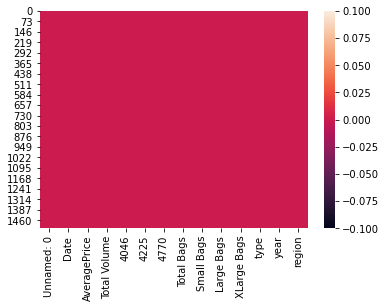

In [160]:
# Here we are getting details of the data like null values
sns.heatmap(data.isnull())

In [161]:
# using ordinal encoder to encode the gender because computer does not take these values which are in the given data 
from sklearn.preprocessing import OrdinalEncoder
ord_encoder=OrdinalEncoder(categories=[['Albany','LosAngeles', 'SouthCarolina', 'Roanoke', 'Southeast', 'Detroit', 'RaleighGreensboro', 'Midsouth', 'RichmondNorfolk', 'GrandRapids', 'TotalUS', 'SouthCentral', 'Plains', 'California', 'StLouis', 'PhoenixTucson', 'Pittsburgh', 'HartfordSpringfield', 'Jacksonville', 'BuffaloRochester', 'SanDiego', 'Denver', 'MiamiFtLauderdale', 'Northeast', 'Atlanta', 'Seattle', 'Philadelphia', 'Boise', 'West', 'NewYork', 'Louisville', 'Nashville', 'NorthernNewEngland', 'HarrisburgScranton', 'Spokane', 'Indianapolis', 'WestTexNewMexico', 'Chicago', 'SanFrancisco', 'Tampa', 'Charlotte', 'BaltimoreWashington', 'LasVegas', 'Columbus', 'Portland', 'Boston', 'Houston', 'GreatLakes', 'DallasFtWorth', 'Syracuse', 'Orlando']])
df1 = ord_encoder.fit_transform(data[['region']])
df1

array([[ 0.],
       [ 0.],
       [ 0.],
       ...,
       [40.],
       [40.],
       [40.]])

In [162]:
data['region']=df1

In [163]:
#droping type because all value are same in all the columns
data.drop(['type','Date'],axis=1,inplace=True)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

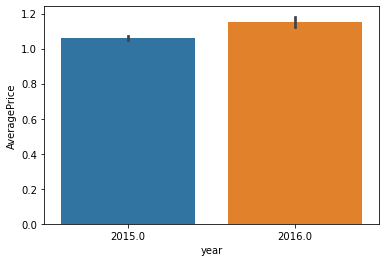

In [164]:
#plotting average price in which year it is high
sns.barplot(x="year",y="AveragePrice",data=data)

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>,
        <AxesSubplot:title={'center':'4046'}>],
       [<AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>],
       [<AxesSubplot:title={'center':'Large Bags'}>,
        <AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'region'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

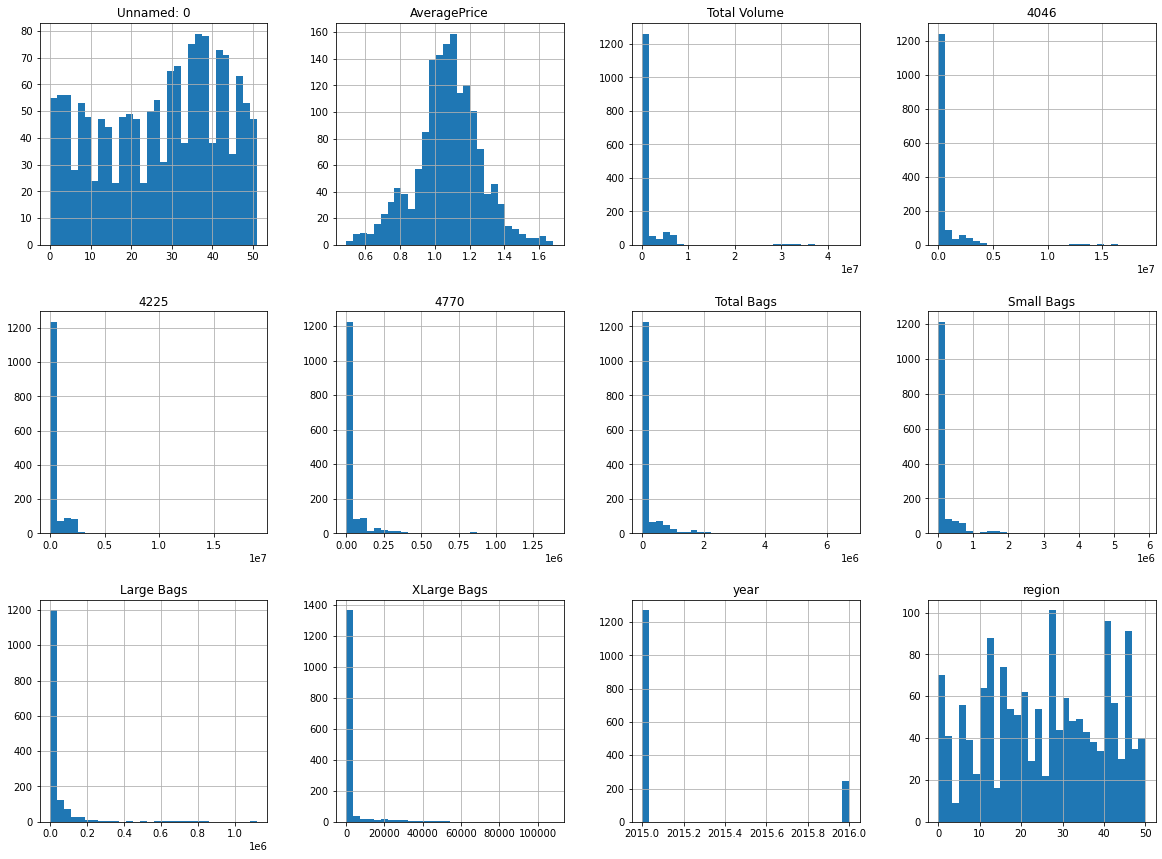

In [165]:
#histogram plot to analysie data
data.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

In [166]:
# checking for skewed data 
data.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region         -0.069747
dtype: float64

In [202]:
# performing operation to remove skewness
from sklearn.preprocessing import power_transform
df_new=power_transform(data)

df_new=pd.DataFrame(df_new,columns=data.columns)

In [168]:
# now checking if the skewness is removed or not
df_new.skew()

Unnamed: 0     -0.348219
AveragePrice    0.021101
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
year            0.000000
region         -0.284734
dtype: float64

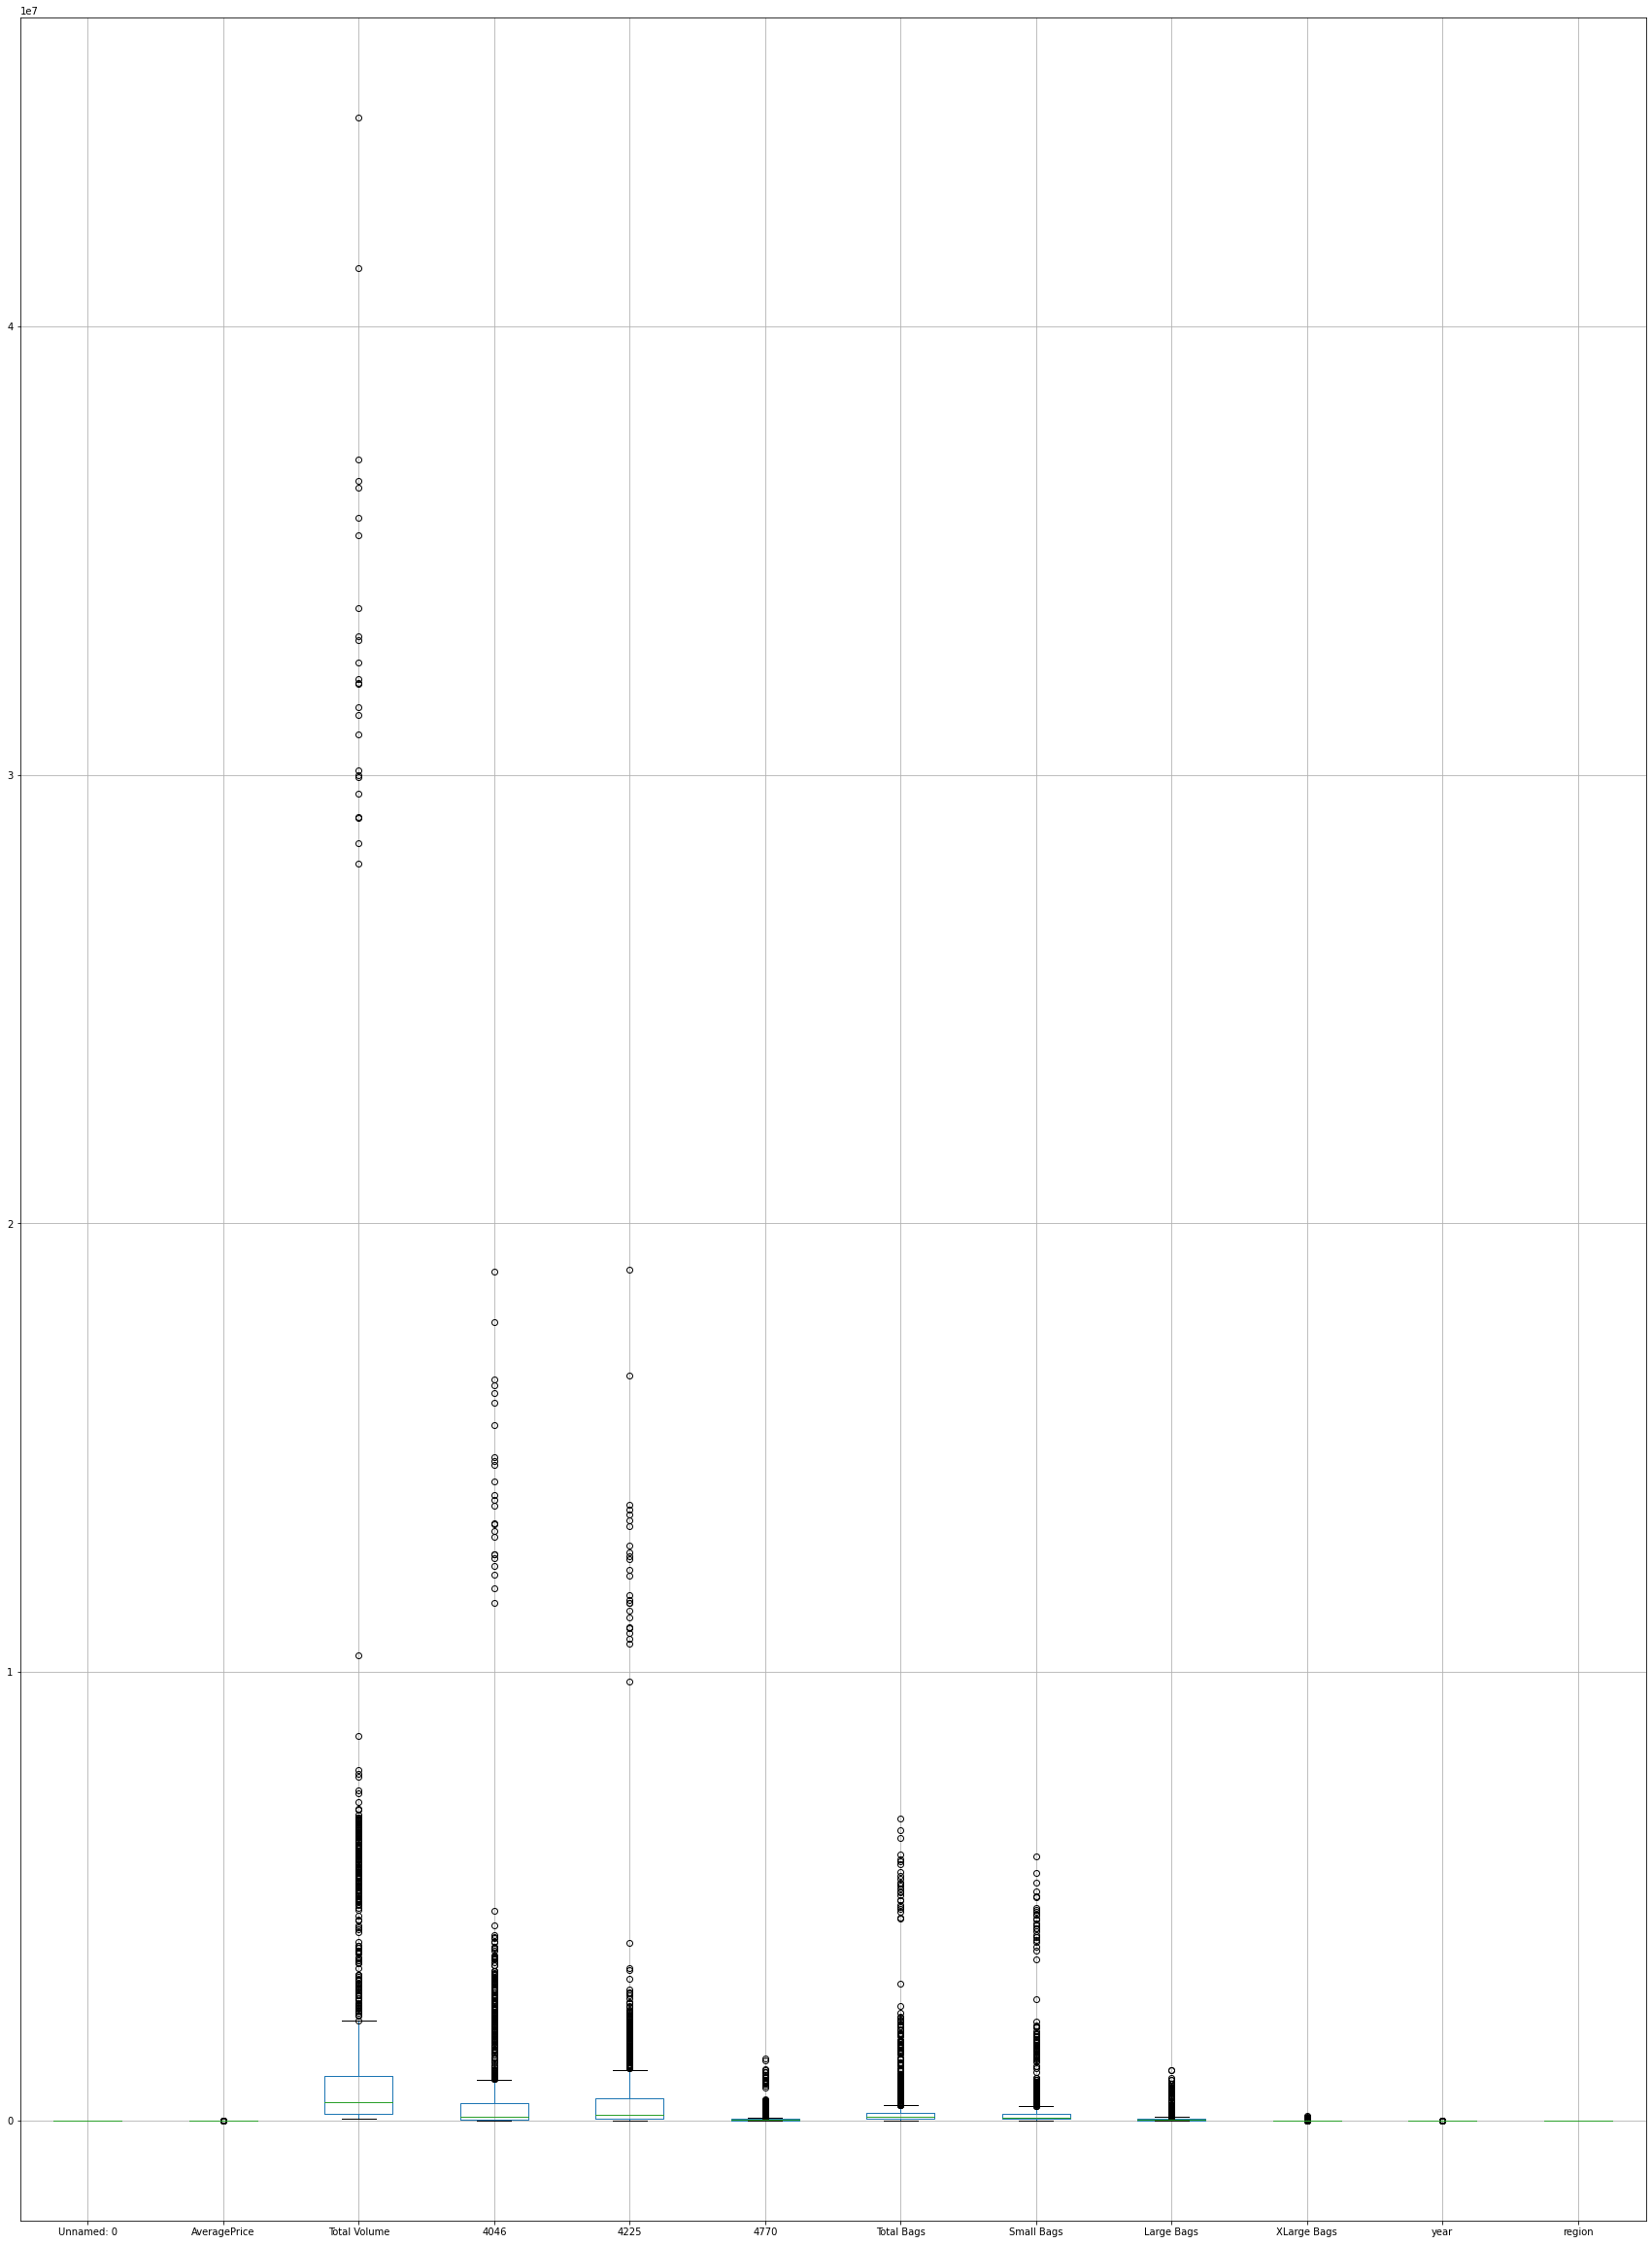

In [169]:
# plotting boxplot to identify outliers
data.boxplot(figsize=[30,50])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [170]:
# no need of this because index is there
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [171]:
#data cleaning due to outliers 
q=data['Total Volume'].quantile(0.70)
data_cleaned = data[data['Total Volume']<q]
q=data_cleaned['4046'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['4046']<q]
q=data_cleaned['4225'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['4225']<q]
q=data_cleaned['4770'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['4770']<q]
q=data_cleaned['Total Bags'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['Total Bags']<q]
q=data_cleaned['Large Bags'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['Large Bags']<q]
q=data_cleaned['XLarge Bags'].quantile(0.70)
data_cleaned = data_cleaned[data_cleaned['XLarge Bags']<q]

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

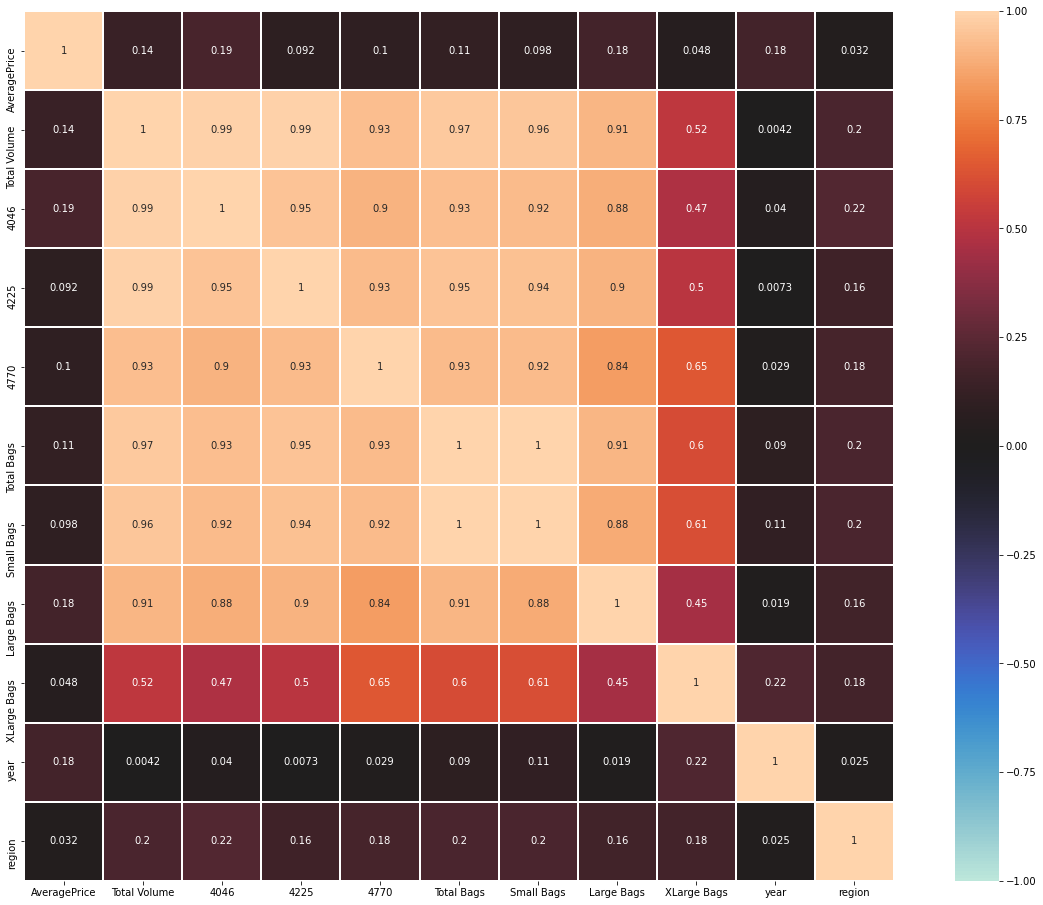

In [174]:
# checking of corelation using heat map
df_corr =data.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(df_corr,  vmin=-1,annot=True,
           square=True,center=0,fmt='.2g',linewidths=1,)
plt.tight_layout

In [176]:
# splitting the data in x and y form for test and train
y=data['region']

x=data.drop(columns=['region'])

In [177]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0
5,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.00,2015.0
6,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.00,2015.0
7,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.00,2015.0
8,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.00,2015.0
9,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.00,2015.0


In [178]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
5        0.0
6        0.0
7        0.0
8        0.0
9        0.0
10       0.0
11       0.0
12       0.0
13       0.0
14       0.0
15       0.0
16       0.0
17       0.0
18       0.0
19       0.0
20       0.0
21       0.0
22       0.0
23       0.0
24       0.0
25       0.0
26       0.0
27       0.0
28       0.0
29       0.0
30       0.0
31       0.0
32       0.0
33       0.0
34       0.0
35       0.0
36       0.0
37       0.0
38       0.0
39       0.0
40       0.0
41       0.0
42       0.0
43       0.0
44       0.0
45       0.0
46       0.0
47       0.0
48       0.0
49       0.0
50       0.0
51       0.0
52      24.0
53      24.0
54      24.0
55      24.0
56      24.0
57      24.0
58      24.0
59      24.0
60      24.0
61      24.0
62      24.0
63      24.0
64      24.0
65      24.0
66      24.0
67      24.0
68      24.0
69      24.0
70      24.0
71      24.0
72      24.0
73      24.0
74      24.0
75      24.0
76      24.0

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

In [180]:
#using dtc algoritm
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [181]:
clf.score(x_train,y_train)

1.0

In [182]:
y_pred=clf.predict(x_test)

In [183]:
clf.score(x_test,y_test)

0.8736842105263158

In [203]:
#using logistic regression 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [185]:
y_pred=log_reg.predict(x_test)

In [186]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.3078947368421053

In [187]:
#implementing the random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

In [188]:
print(accuracy_score(y_test,predrf))

0.9736842105263158


In [189]:
print(confusion_matrix(y_test,predrf))

[[16  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  6]]


In [190]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         6
         4.0       1.00      1.00      1.00         1
         5.0       1.00      1.00      1.00         3
         6.0       1.00      0.75      0.86         4
         7.0       1.00      1.00      1.00         3
         8.0       1.00      1.00      1.00         9
         9.0       1.00      1.00      1.00         8
        10.0       1.00      1.00      1.00        11
        11.0       1.00      1.00      1.00         9
        12.0       1.00      1.00      1.00         2
        13.0       1.00      1.00      1.00        21
        14.0       1.00      1.00      1.00         5
        15.0       0.88      1.00      0.93         7
        16.0       0.71      1.00      0.83         5
        17.0       0.80    

In [191]:
#svr
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
ad_pred = svr.predict(x_test)

In [192]:
print(accuracy_score(y_test,predrf))

0.9736842105263158


In [193]:
print(confusion_matrix(y_test,predrf))

[[16  0  0 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 [ 0  0  5 ...  0  0  0]
 ...
 [ 0  0  0 ...  2  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  6]]


In [194]:
print(classification_report(y_test,predrf))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        16
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         5
         3.0       1.00      1.00      1.00         6
         4.0       1.00      1.00      1.00         1
         5.0       1.00      1.00      1.00         3
         6.0       1.00      0.75      0.86         4
         7.0       1.00      1.00      1.00         3
         8.0       1.00      1.00      1.00         9
         9.0       1.00      1.00      1.00         8
        10.0       1.00      1.00      1.00        11
        11.0       1.00      1.00      1.00         9
        12.0       1.00      1.00      1.00         2
        13.0       1.00      1.00      1.00        21
        14.0       1.00      1.00      1.00         5
        15.0       0.88      1.00      0.93         7
        16.0       0.71      1.00      0.83         5
        17.0       0.80    

In [195]:
probes = rf.predict_proba(x_test)

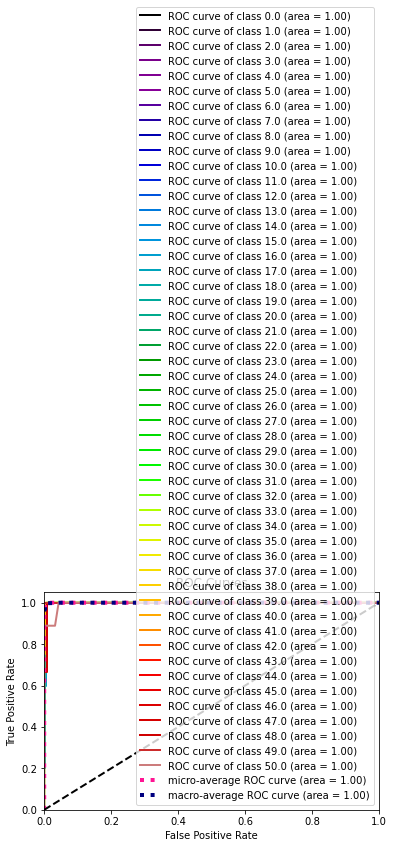

In [196]:
import scikitplot as skplt
skplt.metrics.plot_roc(y_test,probes)
plt.show()

In [207]:
# cross validation score for the algorithm log_reg
from sklearn.model_selection import cross_val_score
scr = cross_val_score(log_reg,x,y,cv=5)
print("cvs of lr:",scr.mean())

cvs of lr: 0.28283828382838283


In [208]:
#cross validation score for the algorithm clf
from sklearn.model_selection import cross_val_score
scr = cross_val_score(clf,x,y,cv=5)
print("cvs of lr:",scr.mean())

cvs of lr: 0.8134575299635227


In [197]:
from sklearn.model_selection import GridSearchCV

In [198]:
#gridsearch cv
parameters={'n_estimators':[100,200],
           'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8,9],
           'criterion':['gini','entropy']}

In [199]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [201]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200]})

In [ ]:
GCV.best_params_

In [204]:
mod = RandomForestClassifier(criterion='entropy',max_depth=6,max_features='log2',n_estimators=100)

In [205]:
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred))

0.9368421052631579


In [206]:
#model saving
import pickle

from sklearn import model_selection
filename = 'avacado.sav'
pickle.dump(data, open(filename, 'wb'))